In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import sympy
sympy.init_printing(use_unicode=True)

# Double Bend Achromat

## Simplest case

We consider a simplest cell that satisfy achromatic condition. The minimum required lattice is:
\begin{align}
B-O-QF-O-B \nonumber
\end{align}

Let's assume the bending magnet has length $L$ and bending angle $\theta$.  We use thin length approximation on the focusing quad, which has focal length $f$.  The distance between the bending magnet and quadrupole is $L_1$. From the symmetry of the lattice, we require that zero dispersion outside the cell and the dispersion derivative $d'$ vanishes at the center of the quad. 



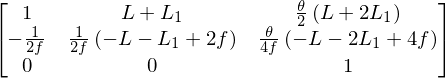

In [38]:
l,l1,t,f=sympy.symbols("L L_1 \\theta f")
def matd_q(f):
    return sympy.Matrix([[1,0,0],[1/f,1,0],[0,0,1]])
def matd_d(d, ang):
    return sympy.Matrix([[1,d,d*ang/2],[0,1,ang],[0,0,1]])
mat_half_dba=matd_q(-2*f)*matd_d(l1,0)*matd_d(l,t)
sympy.simplify(mat_half_dba)

Therefore, the required quad focal length for the achromatic condition is 
\begin{align}
f=\frac{L+2L_1}{4}
\end{align}

And the dispersion function at central point is
\begin{align}
D_c=\frac{\theta}{2}\left(L+2L_1\right)
\end{align}

The one quad between dipole can only match dispersion.  In order to match the optics function also, we can add more complicated symmetric lattice between two dipoles. But as seen below, the dispersion function in the dipole will not change, as long as achromatic condition on both side holds.

## Minimize $\mathcal{H}$ function in DBA

Since one side of the dipole entrance (outward side from the cell) is dispersion free, the dispersion inside the dipole is determined as:
\begin{align}
D(s)&=\frac{1}{2}s\theta(s)=\frac{s^2}{2\rho}\\
D'(s)&=\theta(s)=\frac{s}{\rho}
\end{align}

Therefore, we can only optimized the $\mathcal{H}$ by varying the twiss parameters in dipole. Assuming the optics at the achromatic side of dipole is $\beta=\beta_0$, $\alpha=\alpha_0$ and $\gamma_0=\left(1+\alpha_0^2\right)/\beta_0$.  Therefore, at location $s$ the twiss parameters read:
\begin{align}
\beta(s)&=\frac{1}{\gamma_0}+\gamma_0\left(s-\frac{\alpha_0}{\gamma_0}\right)^2\\
\alpha(s)&=\alpha_0-\gamma_0 s \\
\gamma(s)&=\gamma_0
\end{align}

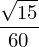

In [37]:
beta0, tbeta, alpha0= sympy.symbols("\\beta_0 \\tilde\\beta \\alpha_0")
rho, s= sympy.symbols("\\rho s")
gamma0=(1+alpha0*alpha0)/beta0

beta=1/gamma0+gamma0*(s-alpha0/gamma0)*(s-alpha0/gamma0)
alpha=alpha0-gamma0*s

d=s*s/2/rho
dp=s/rho

H=sympy.simplify(beta*dp*dp+2*alpha*d*dp+gamma0*d*d)
Hint=sympy.integrate(H,s)
H_ave=(Hint.subs(s,l)-Hint.subs(s,0))/l
H_simplified=sympy.simplify(H_ave.subs(beta0,tbeta*l)/l/l/l*rho*rho)
H_simplified.subs(alpha0, 10*tbeta/4)
H_simplified.subs(alpha0, sympy.sqrt(15)).subs(tbeta,sympy.sqrt(12)/sympy.sqrt(5))

Therefore the $\mathcal{H}$ function at location s gives:
\begin{align}
\mathcal{H}(s)=\frac{s^{2}}{\rho^{2}} \left(\frac{(1+\alpha_0^{2}) s^{2}}{4\beta_0} - \alpha_0  s + \beta_0 \right)
\end{align}
Then the average $\mathcal{H}$ function in dipole is 
\begin{align}
\left<\mathcal{H}(s)\right>=\frac{L^3}{\rho^2} \left(\frac{L \left(\alpha_0^{2} + 1\right)}{20 \beta_0 } - \frac{\alpha_0}{4} + \frac{\beta_0}{3L}\right)
\end{align}

It is convenient to define ${\tilde{\beta}}=\beta_0/L$, then we have:
\begin{align}
\left<\mathcal{H}(s)\right>=\rho\theta^3 \left(\frac{\left(\alpha_0^{2} + 1\right)}{20 \tilde{\beta}} - \frac{\alpha_0}{4} + \frac{\tilde{\beta}}{3}\right)
\end{align}

To minimize $\mathcal{H}$ with two independent variable $\tilde\beta$ and $\alpha_0$, we have 
\begin{align}
\frac{\alpha_0}{10\tilde\beta}=\frac{1}{4}
\end{align}

Then $\tilde\beta=\sqrt{12/5}$, and the minimum $\mathcal{H}$ gives:
\begin{align}
\mathcal{H}_{min}=\frac{\sqrt{15}}{60}\rho\theta^3
\approx 0.06455\rho\theta^3
\end{align}

at initial condition: 
\begin{align}
\beta_0&=\sqrt{12/5}L \\
\alpha_0&=\sqrt{15}\\
\gamma_0&=\frac{16}{\sqrt{12/5}L}
\end{align}

Therefore the beta waist should be at:
\begin{align}
s^* &= \frac{\alpha_0}{\gamma_0} = \sqrt{15} \sqrt{12/5} L /16 = \frac{3}{8} L
\end{align}
with beta function at waist:
\begin{align}
\beta^* &= \frac{1}{\gamma_0} = \sqrt{12/5} L /16 = \frac{3}{8\sqrt{15}} L
\end{align}

At location of the thin length Quad, we have:
\begin{align}
\beta(s) &= \beta^* + \frac{(s-s^*)^2}{\beta^*}  \\
&= \frac{\sqrt{3/5}}{8} L + \frac{16}{\sqrt{12/5}L} \left(L_1+\frac{5}{8} L\right)^2
\end{align}


0.06461442292592653


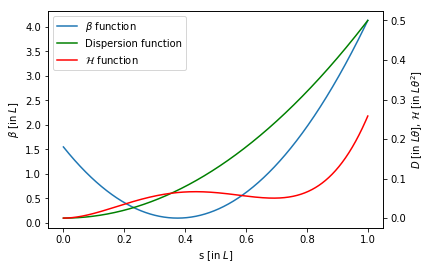

In [45]:
fig, ax=plt.subplots()
ax_m=ax.twinx()
norm_s=np.linspace(0,1,1000)
d=norm_s*norm_s/2.0
ds=norm_s
be_s=3.0/4/np.sqrt(60.0)
s_star=3.0/8
be=be_s+(norm_s-s_star)*(norm_s-s_star)/be_s
al=-(norm_s-s_star)/be_s
h=be*ds*ds+2*al*d*ds+d*d/be_s
print(np.average(h))
l1=ax.plot(norm_s,be, label=r'$\beta$ function')
ax.set_xlabel(r's [in $L$]')
ax.set_ylabel(r'$\beta$ [in $L$]')
ax_m.set_ylabel(r'$D$ [in $L\theta$], $\mathcal{H}$ [in $L\theta^2$]')

l2=ax_m.plot(norm_s,d, color='g',label=r'Dispersion function')
l3=ax_m.plot(norm_s,h, color='r',label=r'$\mathcal{H}$ function')
lns=l1+l2+l3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='best')